# Comparing some ROC Curves

## Imports & Globals Section

In [ ]:
from utils.libs import *

In [ ]:
print(f"keras.__version__: {keras.__version__}")
print(f"sklearn.__version__: {sklearn.__version__}")
print(f"tf.__version__: {tf.__version__}")

In [ ]:
os.getcwd()

SEED = 1234
RANDOM_STATE = 42

N_FOLDS = 10

N_COMPONENTS = 2

target_names = ['Occupancy', 'Non-Occupancy']

np.random.seed(seed = SEED)

### Fetch Data: Training Set

In [ ]:
dir_path = "C:\\Users\\Francesco\\Documents\\datasets\\occupancy_data"
file_name = "datatraining.txt"

file_path = os.path.join(dir_path, file_name)

print(file_path)

In [ ]:
train_data = pd.read_csv(file_path)

In [ ]:
train_data.describe(include="all")

In [ ]:
train_data.info()

### Fetch Data: Test Set

In [ ]:
dir_path = "C:\\Users\\Francesco\\Documents\\datasets\\occupancy_data"
file_name = "datatest.txt"

file_path_test_set = os.path.join(dir_path, file_name)

print(file_path)

In [ ]:
test_data = pd.read_csv(file_path_test_set)

In [ ]:
test_data.describe(include="all")

In [ ]:
test_data.info()

## EDA Section

In [ ]:
X = train_data.iloc[:, 1:-1].values
y = train_data.iloc[:, -1].values

X, y = shuffle(X, y, random_state=RANDOM_STATE)

### K-Means clustering

In [ ]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)
wrapper_bench_k_means(data = X, n_clusters = 2, n_init = 10, labels = y_enc, sample_size = X.shape[0])

In [ ]:
# Visualize the results on PCA-reduced data

# n_samples = 100
# reduced_data = PCA(n_components=2).fit_transform(X[0:n_samples,:])
# kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
# kmeans.fit(reduced_data)

# visualize_pca_reduced_data(kmeans, reduced_data, pc_1 = 0, pc_2 = 1)

## Preprocess Data Points: Normalize

In [ ]:
x_test = test_data.iloc[:, 1:-1].values
y_test = test_data.iloc[:, -1].values

In [16]:
scaler = StandardScaler()
scaler.fit(X)
x_train_scaled = scaler.transform(X)
x_test_scaled = scaler.transform(x_test)

In [17]:
n_features = x_train_scaled.shape[1]
print(f"# features: {n_features}")

# features: 5


In [18]:
n_classes = len(np.unique(y))
print(f"# classes: {n_classes}")

# classes: 2


In [19]:
n_samples = X.shape[0]
print(f"# samples: {n_samples}")

# samples: 8143


In [20]:
print("n_classes: %d, \t n_samples %d, \t n_features %d"
      % (n_classes, n_samples, n_features))

n_classes: 2, 	 n_samples 8143, 	 n_features 5


(0.0001, 0.31622776601683794)

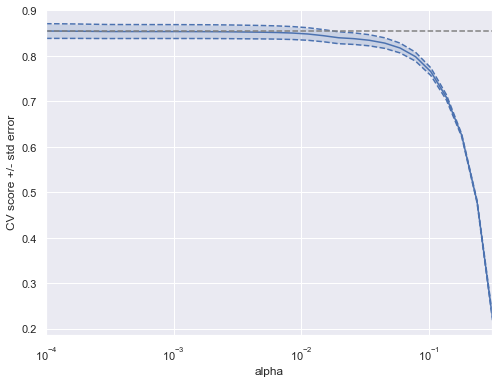

In [21]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
clf.fit(x_train_scaled, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

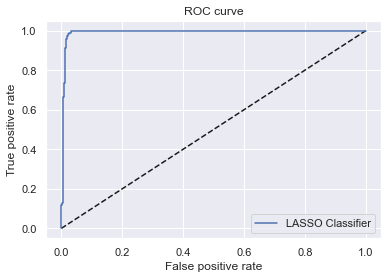

In [22]:
y_pred = clf.predict(x_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LASSO Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Tetst Transformers based on Ensembles of Trees

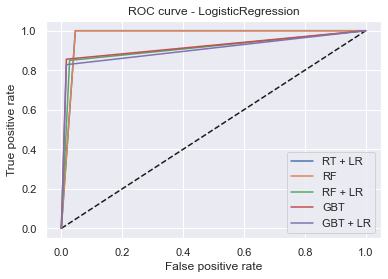

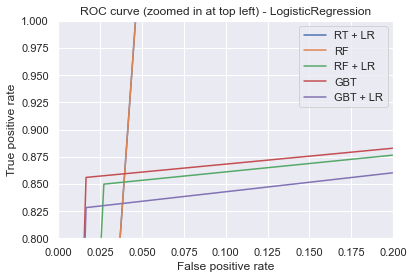

In [23]:
wrapper_feature_transformer_ensembles_trees_clf_v2(
    X = train_data.iloc[:, 1:-1].values,
    y = train_data.iloc[:, -1].values,
    X_test = test_data.iloc[:, 1:-1].values,
    y_test = test_data.iloc[:, -1].values,
    n_estimator = 20, # 10, 
    clf_obj = LogisticRegression(random_state=0, max_iter=10000))

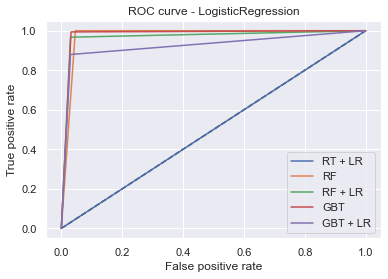

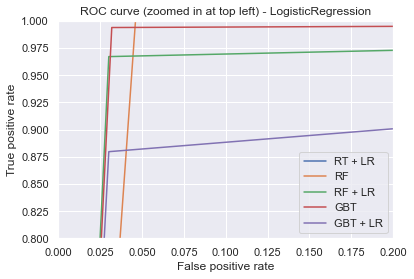

In [27]:
transformer =  random_projection.SparseRandomProjection(n_components = 5, random_state = 0) # None
wrapper_feature_transformer_ensembles_trees_clf_v2(
    X = train_data.iloc[:, 1:-1].values,
    y = train_data.iloc[:, -1].values,
    X_test = test_data.iloc[:, 1:-1].values,
    y_test = test_data.iloc[:, -1].values,
    n_estimator = 20, # 10,
    transformer = transformer,
    clf_obj = LogisticRegression(random_state=0, max_iter=10000))

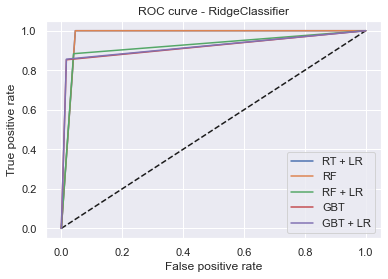

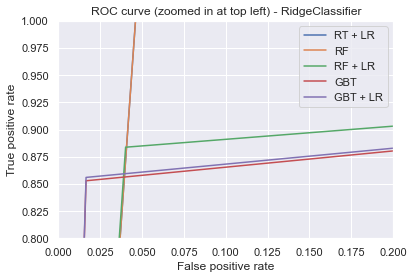

In [28]:
wrapper_feature_transformer_ensembles_trees_clf_v2(
    X = train_data.iloc[:, 1:-1].values,
    y = train_data.iloc[:, -1].values,
    X_test = test_data.iloc[:, 1:-1].values,
    y_test = test_data.iloc[:, -1].values,
    n_estimator = 20, # 10,
    clf_obj = RidgeClassifier(random_state=0, max_iter=10000))

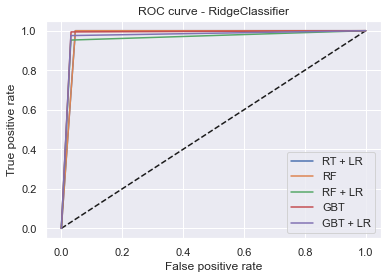

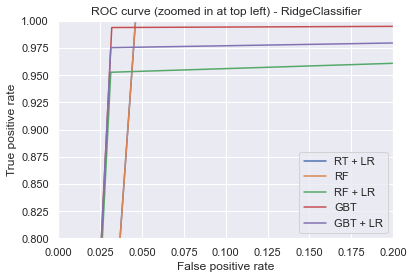

In [29]:
transformer =  random_projection.SparseRandomProjection(n_components = 5, random_state = 0) # None
wrapper_feature_transformer_ensembles_trees_clf_v2(
    X = train_data.iloc[:, 1:-1].values,
    y = train_data.iloc[:, -1].values,
    X_test = test_data.iloc[:, 1:-1].values,
    y_test = test_data.iloc[:, -1].values,
    n_estimator = 20, # 10,
    transformer = transformer,
    clf_obj = RidgeClassifier(random_state=0, max_iter=10000))

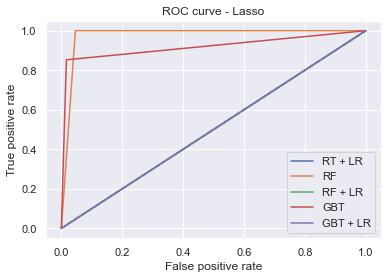

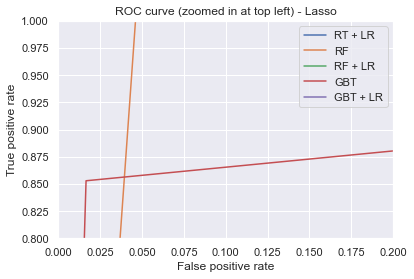

In [30]:
wrapper_feature_transformer_ensembles_trees_clf_v2(
    X = train_data.iloc[:, 1:-1].values,
    y = train_data.iloc[:, -1].values,
    X_test = test_data.iloc[:, 1:-1].values,
    y_test = test_data.iloc[:, -1].values,
    n_estimator = 20, # 10, 
    clf_obj = Lasso(random_state=0, max_iter=10000))

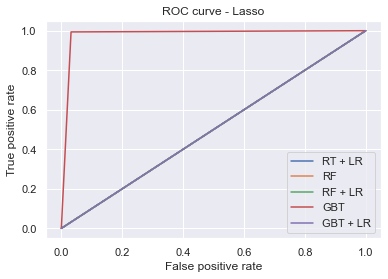

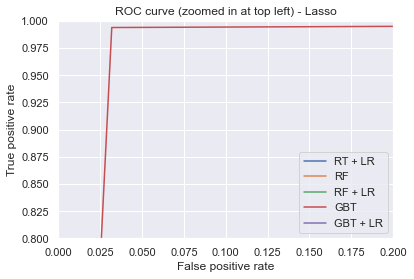

In [33]:
transformer =  random_projection.SparseRandomProjection(n_components = 5, random_state = 0) # None
wrapper_feature_transformer_ensembles_trees_clf_v2(
    X = train_data.iloc[:, 1:-1].values,
    y = train_data.iloc[:, -1].values,
    X_test = test_data.iloc[:, 1:-1].values,
    y_test = test_data.iloc[:, -1].values,
    n_estimator = 20, # 10,
    transformer = transformer,
    clf_obj = Lasso(random_state=0, max_iter=10000))

In [ ]:
wrapper_feature_transformer_ensembles_trees_clf_v2(
    X = train_data.iloc[:, 1:-1].values,
    y = train_data.iloc[:, -1].values,
    X_test = test_data.iloc[:, 1:-1].values,
    y_test = test_data.iloc[:, -1].values,
    n_estimator = 20, # 10, 
    clf_obj = LassoLars(alpha=0.01, random_state=0, max_iter=10000))

### Test Pipeline

In [ ]:
set_config(display='diagram')

In [ ]:
numeric_features = 'Temperature,Humidity,Light,CO2,HumidityRatio'.split(',')
categorical_features = []

clf_obj = RidgeClassifier()

clf = create_and_run_pipeline(train_data.iloc[:,1:-1], y, clf_obj, numeric_features, categorical_features, strategy_numeric = 'mean')
clf

In [ ]:
numeric_features = 'Temperature,Humidity,Light,CO2,HumidityRatio'.split(',')
categorical_features = []

clf_obj = RidgeClassifier()

clf = create_and_run_pipeline(train_data.iloc[:,1:-1], y, clf_obj, numeric_features, categorical_features, strategy_numeric = 'median')
clf

In [ ]:
numeric_features = 'Temperature,Humidity,Light,CO2,HumidityRatio'.split(',')
categorical_features = []

clf_obj = RidgeClassifier()

clf = create_and_run_pipeline(train_data.iloc[:,1:-1], y, clf_obj, numeric_features, categorical_features, strategy_numeric = 'most_frequent')
clf

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
}

clf = create_and_run_pipeline_GDCV(train_data.iloc[:,1:-1], y, param_grid, num_cv = 10, clf_obj = LogisticRegression())

In [ ]:
np.linspace(1e+2, 1e+3, num=4, dtype=np.int32)

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'classifier__C': [0.0001, 0.001, 0.1, 1.0, 10, 100],
    # 'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__class_weight': [None, 'balanced'],
    # 'classifier__l1_ratio': np.linspace(.0, 1.0, num=10,),
    # 'classifier__tol': np.linspace(1e-4, 1e-2, num=5),
    'classifier__random_state': [0, 42, 123, 1234],
    # 'classifier__solver': ['liblinear', 'sag', 'saga'],
    'classifier__max_iter': np.linspace(1e+2, 1e+3, num=4, dtype=np.int32),
}

clf, grid_search = create_and_run_pipeline_GDCV_v2(train_data, test_data, param_grid, n_folds = N_FOLDS, clf_obj = LogisticRegression())

In [ ]:
print(grid_search.best_score_)

In [ ]:
print(grid_search.best_params_)

In [ ]:
print(grid_search.best_estimator_)

### References

- (Logistic Regression with Keras) https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/
- (panda-ml) https://pandas-ml.readthedocs.io/en/latest/index.html

### Tutorials
- (K-means) https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
- (Column Transformer with Mixed Types) https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py
- (Feature transformations with ensembles of trees) https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

### Theory
- (6.3. Preprocessing data) https://scikit-learn.org/stable/modules/preprocessing.html